In [1]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# WeRateDogs! : A Data Wrangling Project
This project focuses primarily on the **data wrangling process**, which includes the following steps: **gathering, assessing, and cleaning**. Additionally, an **Exploratory Data Analysis (EDA)** section is included to better understand the data.

The data used in this project was gathered from multiple sources, including:
- A CSV file
- A file containing multiple JSON records
- A TSV file retrieved from the web

The dataset centers around the [WeRateDogs](https://twitter.com/dog_rates) Twitter account, which is popular for rating dogs (usually on a denominator of 10) and sharing their photos.

**Main Report Contents**
- Data Wrangling Process: 
  - Gathering
  - Assessment:
    - Visual Assessment
    - Programmatic Assessment
    - Assessment report with specifying quality and tidiness issues
  - Cleaning:
    - Cleaning
    - Storing Data
    - Cleaning Report
- EDA (Exploratory Data Analysis)
- Conclusion

## Data Wrangling Process
### Gathering Data

Getting the first dataset from the given `.csv` file for the twitter archive and store it in a DataFrame to start analyzing.

In [2]:
# reading the twitter archive csv file
twitter_arch_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


Getting the second dataset from the given link for the images predictions `.tsv` file using `requests` package.

In [3]:
# getting the image prediction data from the url using requests
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_res = requests.get(img_pred_url)
img_res.status_code

200

Then, getting the file contents and save it locally after getting the succeed getting operation status code `200`.

In [4]:
# saving the image prediction data to a tsv file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(img_res.content)

After saving locally, reading it as a DataFrame to be prepared for analysis.

In [5]:
# reading and storing image prediction data in a dataframe
img_data = pd.read_csv('image-predictions.tsv', sep='\t')
img_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Getting the third dataset from the given `.txt` file which contains many `JSON` objects for all tweets to extract more information about each one from that file.

In [6]:
# reading the twitter json data from the file line by line and storing it in a dataframe
with open("tweet-json.txt", "r") as file:
    tweets = [json.loads(line) for line in file]
    tweets_data = pd.DataFrame(tweets, columns=['id', 'created_at', 'retweet_count', 'favorite_count'])

tweets_data

,id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,41,111
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,147,311
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,47,128
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,48,132


The code above reads each line of the file of `JSON` objects, converts it to a dictionary, and then creates a DataFrame from the list of dictionaries. The DataFrame contains the tweet ID, creation date, retweet count, and favorite count for each tweet. This is useful for analyzing the engagement metrics of the tweets in the dataset.

Now, I've gathered three datasets and turned them into DataFrames each one contains different kind of data.

### Assessing Data
Here I will assess the the datasets I have gathered above to define quality and tidiness issues.
The assessment process includes:
- Visual Assessment
- Programmatic Assessment
- Assessment Report

#### Visual Assessment

Displaying each dataset with different methods to valuate them and find any noticeable issues.

##### Twitter Archive Dataset

In [7]:
# display the first 10 rows of the twitter archive data
twitter_arch_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


In [8]:
# checking a sample of the twitter archive data
twitter_arch_data.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
602,798644042770751489,NaN,NaN,2016-11-15 21:49:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paull. He just stubbed ...,6.704450e+17,4.196984e+09,2015-11-28 03:31:48 +0000,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,NaN,NaN,NaN,NaN
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,NaN,NaN,NaN,NaN
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,NaN,NaN,NaN
1235,712668654853337088,NaN,NaN,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,NaN,NaN,NaN,NaN
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,NaN,NaN,NaN
563,802572683846291456,NaN,NaN,2016-11-26 18:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's h*ckin ferocious. Dandel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802572683...,12,10,Winnie,NaN,NaN,NaN,NaN
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,NaN,NaN,NaN,NaN


In [9]:
# checking the last 10 rows of the twitter archive data
twitter_arch_data.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,NaN,NaN,NaN,NaN
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,NaN,NaN,NaN,NaN
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,NaN,NaN,NaN,NaN
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,NaN,NaN,NaN,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,NaN,NaN,NaN,NaN
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN


There are many dog names that are not valid, such as "a", "an", "the", etc.

In [10]:
# getting the shape of the dataset
twitter_arch_data.shape

(2356, 17)

##### Images Predictions Dataset

In [11]:
# display the first 10 rows of the image prediction data
img_data.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# checking a sample of the image prediction data
img_data.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1195,740365076218183684,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,0.246313,False,Windsor_tie,0.172446,False,mushroom,0.137516,False
1309,754011816964026368,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True


In [13]:
# checking the last 10 rows of the twitter archive data
img_data.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
# getting the shape of the dataset
img_data.shape

(2075, 12)

##### Twitter's API Dataset

In [15]:
# displaying the first 10 rows of the twitter data
tweets_data.head(10)

,id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,3261,20562
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,2158,12041
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,16716,56848
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,4429,28226
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,7711,32467


In [16]:
# checking a sample of the twitter data
tweets_data.sample(7)

,id,created_at,retweet_count,favorite_count
2250,667801013445750784,Fri Nov 20 20:25:43 +0000 2015,101,346
1952,673656262056419329,Mon Dec 07 00:12:23 +0000 2015,265,769
2254,667766675769573376,Fri Nov 20 18:09:16 +0000 2015,243,476
1332,705428427625635840,Thu Mar 03 16:23:38 +0000 2016,1931,4188
1290,708109389455101952,Fri Mar 11 01:56:49 +0000 2016,610,2124
1467,694183373896572928,Mon Feb 01 15:39:48 +0000 2016,1040,3236
630,794205286408003585,Thu Nov 03 15:51:10 +0000 2016,3895,10314


In [17]:
# checking the last 10 rows of the twitter data
tweets_data.tail(10)

,id,created_at,retweet_count,favorite_count
2344,666058600524156928,Mon Nov 16 01:01:59 +0000 2015,61,115
2345,666057090499244032,Mon Nov 16 00:55:59 +0000 2015,146,304
2346,666055525042405380,Mon Nov 16 00:49:46 +0000 2015,261,448
2347,666051853826850816,Mon Nov 16 00:35:11 +0000 2015,879,1253
2348,666050758794694657,Mon Nov 16 00:30:50 +0000 2015,60,136
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,41,111
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,147,311
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,47,128
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,48,132
2353,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,532,2535


In [18]:
# getting the shape of the dataset
tweets_data.shape

(2354, 4)

After evaluating the `shape` of the three datasets, row numbers is mismatched.<br>
That point indicates to know about irrelevant observations in the three datasets to find alike observation rows.

#### Programmatic Assessment
In this section, I'll use more specific programmatic methods to display statistics, detect duplicates, and perform other checks on the data.

##### Twitter Archive Dataset

In this section, I will assess the `twitter_arch_data` dataset to identify potential quality and tidiness issues.  
First, I will use the `info()` method to get a brief overview of the data types and the number of null values in each column.

In [19]:
# display information about the twitter archive data
twitter_arch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

Given the number of rows in this dataset (2356), completeness issues are observed in some columns, along with validity issues in the `id` and timestamp fields.

In this dataset, the retweet-related columns contain many null values, which indicate original tweets.  
Therefore, checking these columns is necessary to ensure the relationship between them before proceeding with the cleaning process.

In [20]:
# checking the relationship between the columns in the twitter archive data
twitter_arch_data[twitter_arch_data['retweeted_status_id'].notnull() & 
                  twitter_arch_data['retweeted_status_user_id'].notnull() &
                  twitter_arch_data['retweeted_status_timestamp'].notnull()].shape[0]

181

The three retweet-related columns (`retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`) always appear together in the same rows, as indicated by their equal non-null counts (181).  
Since all three columns have identical non-null values, we can confidently rely on just one of them (e.g., `retweeted_status_id`) to filter out retweets.  
This approach simplifies the data cleaning process by focusing only on original tweets.

The same method will be implemented on `in_reply_to_status_id` and `in_reply_to_user_id` as they are related to the originality of the tweets.

In [21]:
twitter_arch_data[twitter_arch_data['in_reply_to_status_id'].notnull() & 
                  twitter_arch_data['in_reply_to_user_id'].notnull()].shape[0]

78

The two columns appear together in the same rows, as indicated by their equal non-null counts `78`.

In [22]:
# displaying a description of the twitter archive data valid columns
twitter_arch_data[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


The code cell above demonstrates statistical information about the numerical columns in twitter archive dataset. There is an issue with the `max` values for the `rating_denominator` and `rating_numerator` columns.

In [23]:
# checking for values are not equal to 10
twitter_arch_data['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
0         1
7         1
70        1
170       1
15        1
150       1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

There are many values aren't equal to 10 in the `rating_denominator` column, which must be replaced with the main denominator of `10`.

In [24]:
# checking for out of range values in rating numerator
twitter_arch_data[twitter_arch_data['rating_numerator'] > 17].shape[0]

25

The `rating_numerator` column has `25` out of range values which are greater than `17`, so removing them in the cleaning process won't affect much.
> **Note:** the value of `17` I have chosen will be set a holder value.

Then, I am checking the `source` column unique values.

In [25]:
# checking source column values in the twitter archive data
twitter_arch_data['source'].value_counts()

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

The source column have HTML-like format with a link of the source and the name of it.

I'm checking for the uniqueness data quality pillar by searching for duplicates by using two methods:

- The first method is looking for duplicates on the entire dataset.
- The second method finds them with an exception for the `tweet_id` column.


In [26]:
# checking duplicates in the twitter archive data
print(twitter_arch_data.duplicated().sum())

0


There isn't any duplicates as the output is `0` for the entire dataset.

In [27]:
# checking duplicates in the twitter archive data without the id column
print((twitter_arch_data.duplicated(subset=['tweet_id'])).sum())

0


There isn't any duplicates as the output is `0` in the two methods, which means that this dataset doesn't have uniqueness issues.

In [28]:
# checking the unique values in the doggo, floofer, pupper and puppo columns
print(twitter_arch_data['doggo'].value_counts())
print(twitter_arch_data['floofer'].value_counts())
print(twitter_arch_data['pupper'].value_counts())
print(twitter_arch_data['puppo'].value_counts())

doggo
doggo    97
Name: count, dtype: int64
floofer
floofer    10
Name: count, dtype: int64
pupper
pupper    257
Name: count, dtype: int64
puppo
puppo    30
Name: count, dtype: int64


##### Images Predictions Dataset

Here, I will review the `Img_data` dataset to detect any possible quality or tidiness concerns.  
The initial step involves using the `info()` method to quickly examine the data types and the presence of null values across the columns.

In [29]:
# display information about the image prediction data
img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


`info` method didn't display any serious issues with the image prediction data except for the data type for the `tweet_id`  column

In [30]:
# displaying a description of the image prediction data
img_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The code cell above demonstrates statistical information about the numerical columns in image prediction dataset.<br>
There is a weird value in the `max` of `p1_conf`. I'll check it because it isn't understandable to get `1` as a model prediction confidence.


In [31]:
img_data[img_data['p1_conf'] >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


As shown above this row actually couldn't been classified as a "dog" by the three prediction models. Therefore, there is a **validity** issue here.

Because there are three prediction columns which classify the image as a dog or not, I will check if there are rows that are not classified as a dog in all three columns.

In [32]:
# checking for rows which don't classify a dog
not_dog = img_data[(img_data['p1_dog'] == False) & (img_data['p2_dog'] == False) & (img_data['p3_dog'] == False)]
not_dog.shape[0]

324

There are `324` rows that are not classified as a dog in all three columns of classifying *(including the previous issue found)*, which is a **validity** issue.

I used here the same two methods I used before with the first dataset to deal with uniqueness quality pillar by looking for duplicates.

In [33]:
# checking for duplicates in the entire image prediction data
print(img_data.duplicated().sum())

0


There isn't any duplicates as the output is `0` for the entire dataset.

In [34]:
# checking for duplicates in the image prediction data without the id column
print((img_data.duplicated(subset=['tweet_id'])).sum())

0


There isn't any duplicates as the output is `0` in the two methods, which means that this dataset doesn't have uniqueness issues.

Here I am checking identical ids in `img_data` and `twitter_arch_data` datasets to make sure that the two datasets are related to each other.

In [35]:
# making a set containing the tweet ids from both dataframes
id_data = set(twitter_arch_data['tweet_id']) & set(img_data['tweet_id'])

# checking duplicates in the tweet ids
print('Number of common ids in the two datasets is:', len(id_data))

Number of common ids in the two datasets is: 2075


So, we have `2075` common tweet ids between the two datasets, which means that there are `281` tweets in the `twitter_arch_data` dataset that don't have image predictions.

##### Twitter's API Dataset

In this part, I will explore the `tweets_data` dataset to highlight any potential issues regarding quality and tidiness.  
I will begin by applying the `info()` method to summarize the data types and count the null values in each column.

In [36]:
# display information about the twitter data
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   created_at      2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


As it's a small dataset it hasn't many issues. It hasn't any completeness issues, but I should turn the `id` and `created_at` columns into string and datetime types.

In [37]:
# displaying a description of the twitter data
tweets_data[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


`describe` method doesn't display issues here because the dataset is ordinary.

The same two ways (methods) to check uniqueness quality pillar I used above is used here too.

In [38]:
# checking for duplicates in the twitter data
print(tweets_data.duplicated().sum())

0


In [39]:
# checking for duplicates in the twitter's api data without the id column
print((tweets_data.duplicated(subset=['id'])).sum())

0


There aren't any duplicates with the two methods used.

I'm checking identical ids in all datasets to make sure that the three datasets are related to each other by putting all ids in a `Series` and then using the `duplicated()` method to find any duplicates.

In [40]:
# making a set containing the tweet ids from all dataframes
all_id_data = set(twitter_arch_data['tweet_id'].astype(str)) & set(img_data['tweet_id'].astype(str)) & set(tweets_data['id'].astype(str))

# checking duplicates in the tweet ids
print('Number of common ids in the three datasets is:', len(all_id_data))

Number of common ids in the three datasets is: 2073


The number of common tweet ids between the three datasets is `2073`, which means that there are `283` tweets in the `twitter_arch_data` dataset that don't have image predictions and `tweets_data` information.

#### Assessing Report: Specifying The Problems Found

##### Quality issues:
**Twitter Archive dataset:**
- retweeted tweets and unoriginal tweets **(Validity)**
- unreal dog names like: "a", "the" or "this" **(Accuracy)**
- `tweet_id` should be in string format (and any other id) **(Validity)**
- `timestamp` should be in datetime format (and any other timestamps) **(Validity)**
- `null` values in `name` column **(Completeness)**
- `rating_numerator` out-of-range values **(Validity)**

**Image prediction dataset:**
- `tweet_id` should be in string format **(Validity)**
- the row with `p1_conf` equals `1` **(Validity)**
- the rows that are not classified as a dog in all classifying columns **(Validity)**

**Twitter's API dataset:**
- `id` should be in string format **(Validity)**
- `created_at` should be in a datetime format **(Validity)**
- common tweet ids between the three datasets **(Consistency)**

##### Tidiness issues:
- dog stages are distributed in columns: `floofer`, `doggo`....etc
- `rating_denominator` column doesn't measure a variable 
- the three datasets should be merged into one dataset

After assessing the three datasets above I found many problems. First dataset has the most issues as it's the biggest one. In this project, quality issues are ranked by severeness like this:
- Completeness
- Validity
- Consistency
- Accuracy

So, issues in the **first dataset** are severe as there are many completeness and validity issues.<br>
There are tweets without correlated images in the images dataset because the difference in the number of entries in the two datasets (the third dataset has a small lack of entries too).<br>
Also, unoriginal tweets (or retweeted tweets) aren't required because they doesn't belong to the author. Unoriginal tweets have values in `retweeted_status_id` and `in_reply_to_status` columns, so these columns will act like **guide** to know unoriginal tweets in the cleaning step.<br>
The `rating_denominator` column has many values which aren't equal to `10`, but actually it doesn't measure a variable, so I will deal with it as a **tidiness** issue.<br>
`source` column contains HTML-like format with a link of the source and the name of it, but it's not very useful for analysis, so I will deal with in the **Dimensionality Reduction** step.<br>
The `rating_numerator` column has many out-of-range values, but I will set `17` as a holder value for them in the cleaning step.<br>
The `name` column has many null values, but I will deal with them by replacing them with a holder value instead of dropping them.<br>


The **second** and the **third datasets** actually have the same issues nearly.<br>
**IDs** and **Timestamps** are stored as integers *(int)* and strings *(object)*, but it isn't the best practice to deal with them. This type of validity issues is common.<br>
Another validity issue in the second dataset related to the prediction confidence ratio of a row which isn't logical as it has the same confidence value in all corresponded columns equals `1`. There is another validity issue in the second dataset related to the rows that are not classified as a dog in all classifying columns.

## Cleaning

In this section, I will clean the datasets to fix the issues I found in the assessment process.<br>
The cleaning process will be done in the following steps:
- Storing a copy from each dataset to avoid any unintentional changes in the original datasets.
- Cleaning the quality issues in each dataset.
- Tidying the datasets to make them more organized and easier to analyze which will contain:
  - Merging the three datasets into one dataset.
- A **Dimensionality Reduction** step to reduce the number of columns in the datasets.
- A **Storing** step to save the cleaned datasets in a CSV file.
- A **Cleaning Report** to summarize the changes made to the datasets.

I will clean each quality issue in the datasets using the Define-Code-Test framework.
- **Define**: Define the issue.
- **Code**: Write the code to fix the issue.
- **Test**: Test the code to ensure that the issue has been fixed.

### Making Copies of the Datasets

In [41]:
# storing a copy of the dataframes to avoid modifying the original data when cleaning the data
twitter_arch_copy = twitter_arch_data.copy()
img_data_copy = img_data.copy()
tweets_data_copy = tweets_data.copy()

This step is crucial to prevent any accidental changes or loss of data.


### Quality Issues:
#### Twitter Archive Dataset

- Change the `tweet_id` column type to string (object) to do best practices dealing with IDs.

**Code**

In [42]:
# converting id column type to string (object)
twitter_arch_data['tweet_id'] = twitter_arch_data['tweet_id'].astype(str)

**Test**

In [43]:
# check the column type to confirm the process
print(twitter_arch_data['tweet_id'].dtype)

object


- Convert the `timestamp` column to `datetime` format to follow best practices when working with time-based data.

**Code**

In [44]:
# convert 'timestamp' column to datetime type
twitter_arch_data['timestamp'] = pd.to_datetime(twitter_arch_data['timestamp'], errors='coerce')

**Test**

In [45]:
# check the column type to confirm the change
twitter_arch_data['timestamp'].dtype

datetime64[ns, UTC]

- To ensure the dataset contains only original tweets, retweets and in-reply-to tweets will be excluded based on the `retweeted_status_id` and `in_reply_to_status_id` columns.

**Code**

In [46]:
# removing retweeted and in-reply-to tweets relying on the 'retweeted_status_id' and 'in_reply_to_status_id' columns
twitter_arch_data = twitter_arch_data[twitter_arch_data.loc[:,'retweeted_status_id'].isnull() &
                                        twitter_arch_data.loc[:,'in_reply_to_status_id'].isnull()]

**Test**

In [47]:
# check info of the 'retweeted_status_id' and 'in_reply_to_status_id' columns after filtering
twitter_arch_data[['retweeted_status_id', 'in_reply_to_status_id']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retweeted_status_id    0 non-null      float64
 1   in_reply_to_status_id  0 non-null      float64
dtypes: float64(2)
memory usage: 49.1 KB


- Filling the `NaN` values in `name` column with `Unknown`

**Code**

In [48]:
# replacing null values with Unknown in the name column
twitter_arch_data.loc[:, 'name'] = twitter_arch_data['name'].fillna('Unknown')

**Test**

Checking the cleaning process by getting the number of `NaN` values in each column.

In [49]:
# checking the null values after cleaning
print('Number of null values in the name column is:',twitter_arch_data['name'].isnull().sum()) 

Number of null values in the name column is: 0


- Removing out-of-range values in the `rating_numerator` column.
Values greater than 17 are considered out of the expected range in this context.

**Code**

In [50]:
# removing out-of-range numerator values
twitter_arch_data = twitter_arch_data[twitter_arch_data['rating_numerator'] <= 17]

**Test**

In [51]:
# checking the numerator column after removing out-of-range values
twitter_arch_data['rating_numerator'].describe()

count    2079.000000
mean       10.595960
std         2.168615
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

- Unreal dog names identified during the [Visual Assessment](#visual-assessment) include entries like: `a`, `an`, `the`, and `this` will be replaced with `Unknown`.

**Code**

In [52]:
# making a list containing unreal dog names observed in the assessment
unreal_names = ['a', 'an', 'this', 'the', 'not']

# replacing unreal names with 'Unknown'
twitter_arch_data['name'] = twitter_arch_data['name'].apply(lambda x: 'Unknown' if x in unreal_names else x)

**Test**

In [53]:
# checking the name column after replacing unreal names
twitter_arch_data['name'].value_counts().head(10)

name
Unknown    662
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Sadie        8
Winston      8
Name: count, dtype: int64

Until here, the `twitter_arch_data` dataset has the cleaned and original tweets only.

#### Image Predictions Dataset

- Change the `tweet_id` column type to string (object) to do best practices dealing with IDs.

**Code**

In [54]:
# converting the id column type to string
img_data['tweet_id'] = img_data['tweet_id'].astype(str)

**Test**

In [55]:
# checking the column type after cleaning
print(img_data['tweet_id'].dtype)

object


- Removing the row which has invalid prediction confidence ratio. 

**Code**

In [56]:
# filtering the p1_conf row with the value of 1
img_data = img_data[img_data['p1_conf'] < 1]

**Test**

In [57]:
# checking statistics of the p1_conf column after filtering
img_data['p1_conf'].describe()

count    2074.000000
mean        0.594353
std         0.271093
min         0.044333
25%         0.364254
50%         0.588030
75%         0.843799
max         0.999984
Name: p1_conf, dtype: float64

In [58]:
# filtering the image prediction data to include only rows that classify a dog
img_data = img_data[
    (img_data['p1_dog'] == True) |
    (img_data['p2_dog'] == True) |
    (img_data['p3_dog'] == True)]

**Test**

In [59]:
# checking the number of rows that don't classify a dog by reassigning the variable used in the issue assessment
not_dog = img_data[(img_data['p1_dog'] == False) & (img_data['p2_dog'] == False) & (img_data['p3_dog'] == False)]
not_dog.shape[0]

0

#### Twitter's API Dataset

- Change the `id` column type to string (object) to do best practices dealing with IDs.

**Code**

In [60]:
# converting the id column type
tweets_data['id'] = tweets_data['id'].astype(str)

**Test**

In [61]:
print(tweets_data['id'].dtype)

object


- Convert the `created_at` column to `datetime` format to follow best practices when working with time-based data.

**Code**

In [62]:
# converting 'created_at' column type to datetime
tweets_data['created_at'] = pd.to_datetime(tweets_data['created_at'], errors='coerce')

C:\Users\dodoy\AppData\Local\Temp\ipykernel_22304\3791646989.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets_data['created_at'] = pd.to_datetime(tweets_data['created_at'], errors='coerce')


**Test**

In [63]:
# checking the column type after cleaning
tweets_data['created_at'].dtype

datetime64[ns, UTC]

- Getting common tweet ids in the three datasets to have common tweets only.

**Code**<br>
I will reassign the `all_id_data` variable from the assessment process to apply the previous cleaning steps on it.

In [64]:
# reassigning the 'all_id_data' variable to contain the tweet ids from all dataframes after cleaning
all_id_data = set(twitter_arch_data['tweet_id'].astype(str)) & set(img_data['tweet_id'].astype(str)) & set(tweets_data['id'].astype(str))

# getting common ids in the three datasets after cleaning all of them
twitter_arch_data = twitter_arch_data[twitter_arch_data['tweet_id'].isin(all_id_data)]
img_data = img_data[img_data['tweet_id'].isin(all_id_data)]
tweets_data = tweets_data[tweets_data['id'].isin(all_id_data)]

**Test**

In [65]:
# checking the shape of the three datasets after filtering
print(twitter_arch_data.shape)
print(img_data.shape)
print(tweets_data.shape)

(1651, 17)
(1651, 12)
(1651, 4)


#### Tidiness Issues:

- Merging the dog stages in one column instead of having them in separate columns.

**Code**

In [66]:
# make a new column 'dog_stage' to merge the dog stage values into one column
twitter_arch_data['dog_stage'] = twitter_arch_data[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda row: next((val for val in row if pd.notnull(val)), None), axis=1)

I will drop the columns which are not required anymore after merging the dog stages in one column.

In [67]:
# dropping the doggo, floofer, pupper and puppo columns
twitter_arch_data = twitter_arch_data.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

Then I will fill the `NaN` values in the `dog_stage` column with `Unknown` to make it more informative.

In [68]:
# filling null values in the dog_stage column with 'Unknown'
twitter_arch_data['dog_stage'] = twitter_arch_data['dog_stage'].fillna('Unknown')

**Test**

In [69]:
# dropping the doggo, floofer, pupper and puppo columns
twitter_arch_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,Unknown
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,Unknown,Unknown
1697,681231109724700672,NaN,NaN,2015-12-27 21:52:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681231109...,11,10,Unknown,pupper
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,Unknown
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408...,10,10,Unknown,Unknown
300,836753516572119041,NaN,NaN,2017-03-01 01:42:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,Unknown
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,Unknown
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo
982,749403093750648834,NaN,NaN,2016-07-03 00:43:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749403093...,10,10,Unknown,Unknown


- The `rating_denominator` column in the `twitter_arch_data` dataset doesn't measure a variable, so I will drop it from the dataset and be aware about its value (the main denominator of `10`).

**Code**

In [70]:
# dropping the rating denominator column
twitter_arch_data = twitter_arch_data.drop(['rating_denominator'], axis=1)

**Test**

In [71]:
# checking the 'twitter_arch_data' dataframe after dropping the rating denominator column
twitter_arch_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,Unknown
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,Unknown
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,Unknown
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,Unknown
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,Unknown,Unknown


- Merging the three datasets into one dataset because they measure the same variable and to make it easier to analyze.

**Code**

In [72]:
# renaming the id column in the tweets data to tweet_id to match the other dataframes
tweets_data = tweets_data.rename(columns={'id': 'tweet_id'})

# merging the three dataframes into one
full_tweets = pd.merge(twitter_arch_data, img_data, on='tweet_id', how='inner')
full_tweets = pd.merge(full_tweets, tweets_data, on='tweet_id', how='inner')

**Test**

In [73]:
# checking the shape of the merged dataframe
full_tweets.shape

(1651, 27)

In [74]:
# checking the head of the merged dataframe
full_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29 00:08:17+00:00,3261,20562


### Dimensionality Reduction
In this step, I will reduce the number of columns in the merged dataset to make it more manageable and easier to analyze. The columns I didn't remove them before in the [Quality Issues](#quality-issues) section will be removed here. The columns are:
- `source`
- `created_at` (because it's already the same as `timestamp`)
- `in_reply_to_status_id` and the other one `in_reply_to_user_id`
- `retweeted_status_id` and other retweet columns as they don't have any values in them after the cleaning process.
- `expanded_urls`
- `jpg_url`

**Code**

In [75]:
# dropping the columns that are not needed in the merged dataframe
full_tweets = full_tweets.drop(['source', 'created_at', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                   'expanded_urls', 'jpg_url'], axis=1)

**Test**

In [76]:
# checking the head of the merged dataframe after dropping the columns
full_tweets.head()

,tweet_id,timestamp,text,rating_numerator,name,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,Tilly,Unknown,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,Unknown,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,Darla,Unknown,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,Franklin,Unknown,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,Unknown,Unknown,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


### Storing the Cleaned Data
Finally, I will save the cleaned dataset to a CSV file for future use.

In [77]:
# storing the merged dataframe to a csv file
pd.DataFrame.to_csv(full_tweets, 'twitter_archive_master.csv', index=False)

### Cleaning Report
I have cleaned the datasets and removed the issues I found in the assessment process after dividing them into quality and tidiness issues.<br>
The **quality issues** cleaning process included:
- Changing the data types of the `tweet_id`, `id`, `timestamp` and `created_at` columns to the appropriate types. That makes it easier to work with the data and perform analysis.
- Removing retweets and in-reply-to tweets from the `twitter_arch_data` dataset because they don't belong to the author or they are not original tweets.
- Filling the `NaN` values in the `name` column with `Unknown` as a holder value instead of dropping them.
- Replacing unreal dog names with `Unknown` alike the previous point.
- Removing out-of-range values in the `rating_numerator` column by setting a maximum value of `17` for them. I chose this value because it is the highest rating given under `20` because basically the ratings should be under the denominator of `10`.
- Removing the row with invalid prediction confidence ratio from the `img_data` dataset. Because it doesn't make sense to have a prediction confidence of `1` for a dog that is not classified as a dog by the three prediction models.

The **tidiness issues** cleaning process included:
- Merging the dog stages into one column instead of having them in separate columns. This is because it's breaking the tidy data principle of having one variable per column.
- Dropping the `rating_denominator` column from the `twitter_arch_data` dataset because it doesn't measure a variable. The denominator must be `10` for all ratings, so it doesn't provide any additional information *(even if it has many values which aren't equal to `10`)*.
- Merging the three datasets into one dataset to make it easier to analyze as they measure the same variable which is "the dog ratings in the tweets".

The **dimensionality reduction** process included:
- Dropping the columns that are not required anymore after merging the three datasets into one dataset. The columns actually explained before in the dimensionality reduction section but there are some columns will be dropped in the EDA section too like `p1`, `p2`, `p3` and their confidence columns because of the **conditions** will be applied on them to get dogs only.

The **storing** process is done by saving the cleaned dataset to a CSV file for future use. The cleaned dataset is saved as `twitter_archive_master.csv` in the current working directory.

## EDA (Exploratory Data Analysis): Getting Some Insights!
After wrangling the data, getting trustworthy insights will be appropriate and right enough. Getting insights by asking questions about the data available is a very suitable way. So, I've chosen some questions to get answered here which are:
- Which dog has the most number of fans?
- What is the rank of dog stages by most ratings?
- Is there a correlation between some dog breeds and people interaction on Twitter?

### Which Dog Has The Most Number of Fans?
This question will be answered guided by numbers of retweets and likes *(or favorites)* for each dog. I'll do this programmatically by getting the retweets and favorites from each related column then visualize top 20 dogs.

In [78]:
# getting the most retweet and favorite counts by sorting the dataframe
ranked_df = full_tweets.sort_values(by=['retweet_count', 'favorite_count'], ascending=False).reset_index(drop=True).copy()

# displaying the top 10 most retweeted and favorite tweets
ranked_df[['retweet_count', 'favorite_count']].head(10)

,retweet_count,favorite_count
0,79515,131075
1,56625,107015
2,52360,75163
3,48265,132810
4,45849,107956
5,42228,95450
6,37911,75639
7,32883,106827
8,31989,67100
9,31314,57622


In [79]:
# printing an initial sentence
print('The most three dogs have fans are..')

# getting a subset of the ranked dataframe
minimized_df = ranked_df[['name', 'retweet_count', 'favorite_count']][:3].copy()

# creating a loop to get each piece of info of each row and print them
for index,row in minimized_df.iterrows():
    print(f'{ranked_df['name'][index]} with retweet count of {ranked_df['retweet_count'][index]} and favorite count of {ranked_df['favorite_count'][index]}')

The most three dogs have fans are..
Unknown with retweet count of 79515 and favorite count of 131075
Stephan with retweet count of 56625 and favorite count of 107015
Unknown with retweet count of 52360 and favorite count of 75163


I have sorted the dogs by the **number of retweets and favorites** in descending order to get the most popular dogs.<br>
The top 20 **known** dogs are displayed in the bar chart below.

In [80]:
# excluding the unknown name from the ranked dataframe
minimized_vis_df = ranked_df[ranked_df['name'] != 'Unknown'].copy()

# creating a subset of the ranked dataframe for visualization of the top 20 most retweeted and favorite tweets
minimized_vis_df = minimized_vis_df[['name', 'retweet_count', 'favorite_count']][:20]

# creating an empty list to store the means of retweet and favorite counts
means_list = []

# creating a loop to get the means of retweet and favorite counts for each row and append them to the list
for index,row in minimized_vis_df.iterrows():
    retweet_iter = minimized_vis_df['retweet_count'][index]
    fav_iter = minimized_vis_df['favorite_count'][index]
    means_list.append(int((retweet_iter+fav_iter)/2))

# printing the means list
print(means_list)

[81820, 76902, 68839, 69855, 49544, 44468, 56345, 50427, 28090, 46347, 44326, 38464, 34002, 27882, 44222, 24504, 26402, 42295, 28334, 35133]


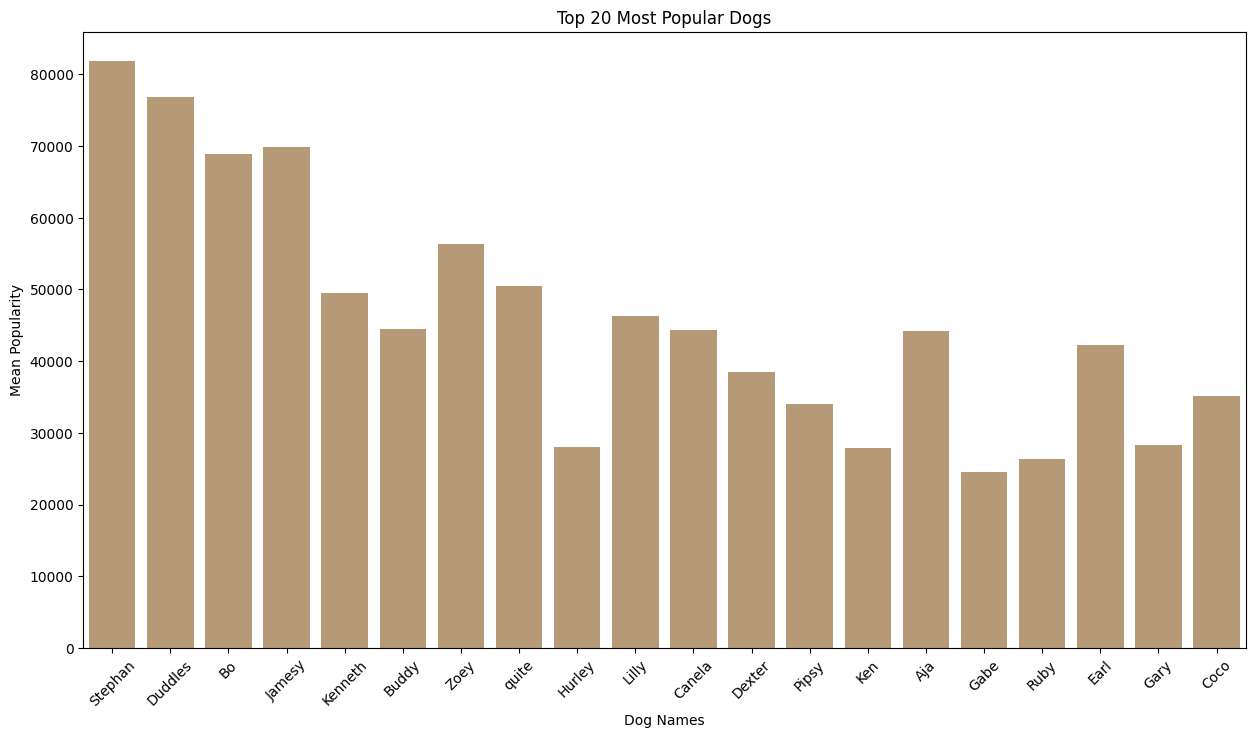

In [81]:
# setting a size for the plot
plt.figure(figsize=(15, 8))

# creating a bar plot to visualize the means of retweet and favorite counts for the top 20 most retweeted and favorite tweets
sns.barplot(x=range(len(means_list)), y=means_list, color='#c19a6b')

# adding a title and labels to the plot
plt.xticks(ticks=range(len(means_list)),labels=minimized_vis_df['name'], rotation=45)
plt.title('Top 20 Most Popular Dogs')
plt.xlabel('Dog Names')
plt.ylabel('Mean Popularity')
# showing the plot
plt.show()

As shown above, the most popular dog is `Stephan` with `56625` retweets and `107015` favorites with a mean popularity above `80000`.<br>
The top 20 dogs displayed have a mean popularity above `25000` and it may vary with the real data which contains many dogs with unknown names.<br>
The method I used to get the most popular dogs is by getting the mean of the retweets and favorites for each dog after sorting them in descending order by the retweets and favorites columns. Calculating mean is a suitable method here to get the popularity ratio for each dog.

### What Is The Rank of Dog Stages By Most Ratings?
This question will be answered by getting the average rating for each dog stage and comparing between them to know which dog stages people like more. I'll do this programmatically by using the data in the `dog_stage` column and the `rating_numerator` column to get the average rating for each dog stage then visualize them to show the results appropriately.

In [82]:
# creating a list of dog stages
dog_stages = list(full_tweets['dog_stage'].unique())
# removing the first element of the list which is 'Unknown'
dog_stages = dog_stages[1:]
# printing the dog stages list to check that 'Unknown' is removed
print(dog_stages)

# creating an empty dictionary to store the average of the rating numerator for each dog stage
avg_ratings = {}
# creating a loop to get the average of the rating numerator for each dog stage and store it in the dictionary
for stage in dog_stages:
    avg = full_tweets[full_tweets['dog_stage'] == stage]['rating_numerator'].mean()
    avg_ratings[stage] = avg


['doggo', 'puppo', 'pupper', 'floofer']


In the code above I calculated the average rating for each dog stage and and stored them in a dictionary to easily visualize them in a bar chart.

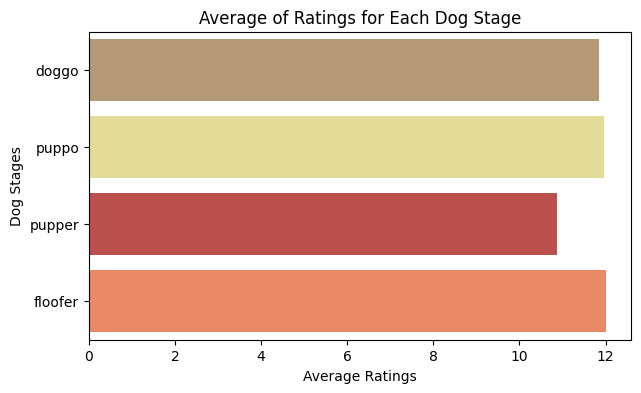

In [83]:
# setting a size for the plot
plt.figure(figsize=(7, 4))
# creating a list of colors for the bar plot
colors = ['#c19a6b', '#f0e68c', '#CE3E3B', '#ff7f50']
# creating a bar plot to visualize the average of ratings for each dog stage
sns.barplot(y=list(avg_ratings.keys()), x=list(avg_ratings.values()), palette=colors, hue=list(avg_ratings.keys()), legend=False)
# adding a title and labels to the plot
plt.title('Average of Ratings for Each Dog Stage')
plt.ylabel('Dog Stages')
plt.xlabel('Average Ratings')
# showing the plot
plt.show()

This visualization shows that the highest average rating is for `puppo` and `floofer` with an average rating of about `12` and the lowest average rating is for `pupper` with an average rating of about `11`.<br>
All dog stages have nearly the same average rating with a small difference between them.<br>
I got the average for each dog stage ratings as an indicator of the popularity of each dog stage.

### Is there a correlation between some dog breeds and people interaction on Twitter?
This question will be answered by getting the average **retweets and favorites** for each **dog breed** and comparing between them to know which dog breeds people like more. Then, I will use an appropriate visualization to show the results clearly.

In [84]:
# creating a subset of the full_tweets dataframe to get the dog breed
breeds_data = full_tweets[['p1', 'p1_conf', 'p1_dog', 
                           'p2', 'p2_conf', 'p2_dog', 
                           'p3', 'p3_conf', 'p3_dog',
                            'retweet_count', 'favorite_count']].copy()
# a for loop to get the dog breed with the highest confidence score and store it in a new column
for index, row in breeds_data.iterrows():
    options = [
        (row['p1_conf'], row['p1_dog'], row['p1']),
        (row['p2_conf'], row['p2_dog'], row['p2']),
        (row['p3_conf'], row['p3_dog'], row['p3'])
    ]
    
    sorted_options = sorted(options, key=lambda x: x[0], reverse=True)
    
    for conf, is_dog, breed in sorted_options:
        if is_dog:
            breeds_data.at[index, 'dog_breed'] = breed
            break
# dropping the column used to get the dog breed
breeds_data = breeds_data.drop(['p1', 'p1_conf', 'p1_dog', 
                                  'p2', 'p2_conf', 'p2_dog', 
                                  'p3', 'p3_conf', 'p3_dog'], axis=1)

# checking the first 10 rows of the breeds data
breeds_data.head(10)

,retweet_count,favorite_count,dog_breed
0,6514,33819,Chihuahua
1,4328,25461,Chihuahua
2,8964,42908,Labrador_retriever
3,9774,41048,basset
4,3261,20562,Chesapeake_Bay_retriever
5,2158,12041,Appenzeller
6,16716,56848,Pomeranian
7,4429,28226,Irish_terrier
8,7711,32467,Pembroke
9,7624,31166,Samoyed


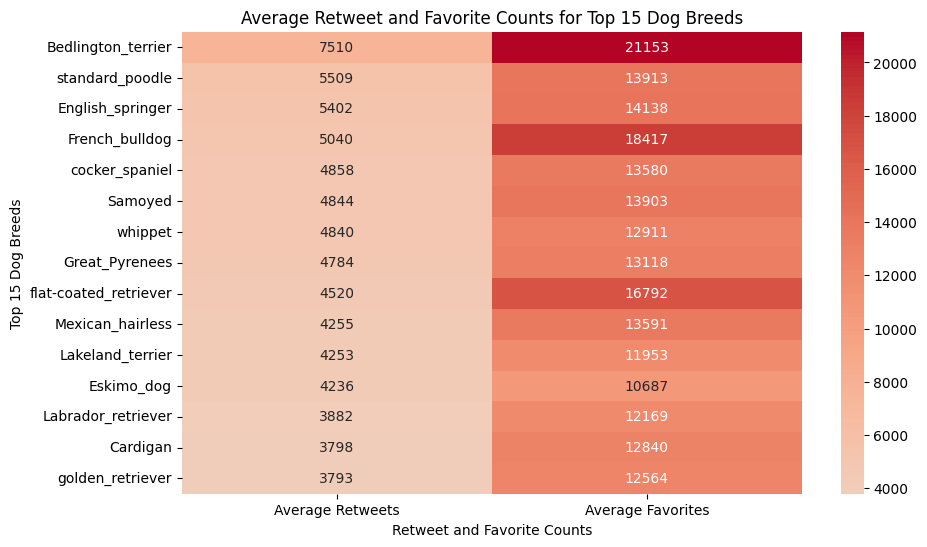

In [85]:
# assigning the dog breed to a new variable
breed_counts = breeds_data['dog_breed'].value_counts()
# getting the index of the breeds that have at least 5 tweets
valid_breeds = breed_counts[breed_counts >= 5].index
# filtering the breeds data to include only the valid breeds
filtered_breeds = breeds_data[breeds_data['dog_breed'].isin(valid_breeds)]

# grouping the filtered breeds data by dog breed and getting the mean of retweet and favorite counts
breeds_grouped = filtered_breeds.groupby('dog_breed')[['retweet_count', 'favorite_count']].mean()
# sort the grouped data by retweet and favorite counts
top_breeds = breeds_grouped.sort_values(['retweet_count', 'favorite_count'], ascending=False).head(15)
# renaming the columns for better readability
top_breeds = top_breeds.rename(columns={
    'retweet_count': 'Average Retweets',
    'favorite_count': 'Average Favorites'})

# setting a size for the plot
plt.figure(figsize=(10, 6))
# creating a heatmap to visualize the correlation between dog breed and retweet and favorite counts
sns.heatmap(top_breeds, annot=True, fmt='.0f', cmap='coolwarm', center=0)
# adding a title and labels to the plot
plt.title('Average Retweet and Favorite Counts for Top 15 Dog Breeds')
plt.xlabel('Retweet and Favorite Counts')
plt.ylabel('Top 15 Dog Breeds')
# showing the plot
plt.show()

The visualization above shows that the highest average retweets and favorites are for **Bedlington terrier** with an average of about `7510` retweets and `21153` favorites.<br>
The lowest average retweets and favorites in the top 15 dog breeds by engagement are for **Golden retriever** with an average of about `3793` retweets and `12564` favorites.<br> 
The colors in the visualization indicate that the average favorites are always higher than the average retweets for each dog breed. This is a common trend in social media engagement, where users tend to like posts more than they retweet them.

## Conclusion
In this project, I have successfully wrangled the WeRateDogs dataset by gathering, assessing, and cleaning the data. I have also performed exploratory data analysis to gain insights into the data. The main findings from the analysis include:
- The most popular dog is **Stephan** with `56625` retweets and `107015` favorites.
- The highest average rating is for **puppo** and **floofer** with an average rating of about `12` and the lowest average rating is for **pupper** with an average rating of about `11`.
- The highest average retweets and favorites are for **Bedlington terrier** with an average of about `7510` retweets and `21153` favorites.
- The lowest average retweets and favorites in the top 15 dog breeds by engagement are for **Golden retriever** with an average of about `3793` retweets and `12564` favorites.
- The average favorites are always higher than the average retweets for each dog breed.

The project has provided valuable insights into the WeRateDogs dataset and demonstrated the importance of data wrangling in the data analysis process. The cleaned dataset is now ready for further analysis and exploration.